
## imports

In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, LeakyReLU

device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
  raise SystemError("GPU device not found")
print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0


## load the Dataset

In [2]:
def parse_dataset(filepath):
    """ function used to parse the data of a dataset """

    # open the dataset
    with open(filepath, "rb") as dataset:
        # read the magic number and the number of images
        magic_number, number_of_images = struct.unpack(">II", dataset.read(8))
        # read the number of rows and number of columns per image
        rows, columns = struct.unpack(">II", dataset.read(8))
        # now read the rest of the file using numpy.fromfile()
        images = np.fromfile(dataset, dtype=np.dtype(np.uint8).newbyteorder(">"))
        # reshape so that the final shape is (number_of_images, rows, columns)
        images = images.reshape((number_of_images, rows, columns))

    # return the images
    return images


def parse_labelset(filepath):
    """ function used to parse the data of a labelset """

    # open the file
    with open(filepath, "rb") as labelset:
        # read the magic number and the number of labels
        magic_number, number_of_labels = struct.unpack(">II", labelset.read(8))
        # now read the rest of the file using numpy.fromfile()
        labels = np.fromfile(labelset, dtype=np.dtype(np.uint8).newbyteorder(">"))

    # return the labels
    return labels

In [3]:
# EDIT THE PATHS OF THE DATASETS HERE
train_images_path = os.path.join(".", "drive", "My Drive", "Colab Notebooks", "Project", "Project2", "Dataset", "train-images-idx3-ubyte")
train_labels_path = os.path.join(".", "drive", "My Drive", "Colab Notebooks", "Project", "Project2", "Dataset", "train-labels-idx1-ubyte")

test_images_path = os.path.join(".", "drive", "My Drive", "Colab Notebooks", "Project", "Project2", "Dataset", "t10k-images-idx3-ubyte")
test_labels_path = os.path.join(".", "drive", "My Drive", "Colab Notebooks", "Project", "Project2", "Dataset", "t10k-labels-idx1-ubyte")


# LOAD THE DATASETS HERE
X_train = parse_dataset(train_images_path)
y_train = parse_labelset(train_labels_path)

X_test = parse_dataset(test_images_path)
y_test = parse_labelset(test_labels_path)


# PRINTS TO MAKE SURE
print("X_train.shape = {}".format(X_train.shape))
print("y_train.shape = {}".format(y_train.shape))
print()
print("X_test.shape = {}".format(X_test.shape))
print("y_test.shape = {}".format(y_test.shape))

X_train.shape = (60000, 28, 28)
y_train.shape = (60000,)

X_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


## print utilities

In [4]:
def print_image(image, rows, columns):
    """ function used to print an image to the console """

    # for each row of the image
    for i in range(rows):
        # for each column
        for j in range(columns):
            # print the value at the coordinate (i, j)
            print("{:3d}".format(image[i, j]), end="")
        # print a newline since the row has finished
        print()
    print()


def plot_image(image):
    """ fuction used to plot an image using matplotlib """

    # plot and show the image
    plt.imshow(image, cmap="gray")
    plt.show()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0203254252252252214 51 20  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 62221252250250250252250160 20  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 62211250252250250250252250250 49  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 41221250250252250250250252250128 10  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0254252252252254252252252254252252 90  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0150190250250252250250169171250250250 82  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 31191250250252189100 20172250250250 8

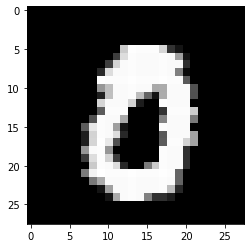

In [5]:
print_image(X_train[69], 28, 28)
plot_image(X_train[69])